## Imports

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Gradient Decent
## 1. What’s the gradient of our function f? Define a gradient function g and plot it.

$f(θ) = (θ −2)^2 + 5$ <br>
$f'(θ) = g(θ) = 2*(θ-2)$

In [46]:
def f(theta):
    return (theta-2)**2 + 5

def g(theta):
    return 2*(theta -2)

results = [f(x) for x in range(1,10,1)]

results 

[6, 5, 6, 9, 14, 21, 30, 41, 54]

<function matplotlib.pyplot.show(close=None, block=None)>

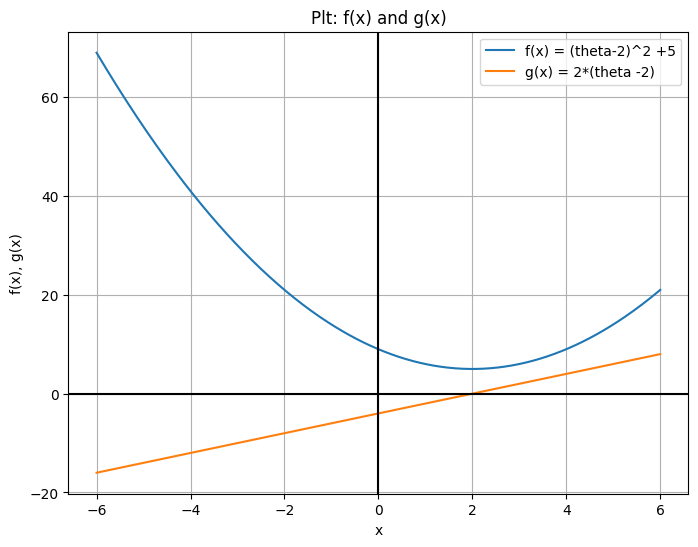

In [47]:
x = np.linspace(-6,6,400)
y_f = f(x)
y_g = g(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y_f, label='f(x) = (theta-2)^2 +5')
plt.plot(x, y_g, label='g(x) = 2*(theta -2)')
plt.title('Plt: f(x) and g(x)')
plt.xlabel('x')
plt.ylabel('f(x), g(x)')

ax = plt.gca()


ax.axhline(0, color='black', linewidth=1.5)  
ax.axvline(0, color='black', linewidth=1.5) 

plt.grid(True)
plt.legend()

plt.show

### 2. Assume a constant learning rate of λ = .8. Write down the general update step for gradient descent.<br> 

General update step: <br>
$θ_{t+1} = θ_{t} − λf′(θ_{t})$

In [48]:
# Lernrate für den Gradientenabstieg
learning_rate = 0.8

# Schrittweise Annäherung, in der theta aktualisiert wird
update_step = lambda theta_old: theta_old - learning_rate * g(theta_old)

# Startwert für theta
theta = 5.0

# Liste zur Speicherung von theta und dem Gradienten
theta_values = [theta]
gradient_values = [g(theta)]
f_values = [f(theta)]

# Iterative Anpassung von theta
for _ in range(1,10,1):
    theta = update_step(theta)
    theta_values.append(theta)
    gradient_values.append(g(theta))
    f_values.append(f(theta))
    print(theta)

0.1999999999999993
3.0800000000000005
1.3519999999999996
2.3888000000000003
1.7667199999999998
2.139968
1.9160192
2.05038848
1.9697669119999999


### 3. Implement gradient descent for minimizing f making use of your defined gradient function g. Compute 20 iterations to find the θ that minimizes f(θ). Plot the sequence of θts against the iteration t. Start with θ0 = 5.

In [51]:
# Learning rate
learning_rate = 0.8

# Stepwise approach in which theta is updated
update_step = lambda theta_old: theta_old - learning_rate * g(theta_old)

# Initial value
theta = 5.0

# List for storing theta and the gradient
theta_values = [theta]
gradient_values = [g(theta)]
f_values = [f(theta)]

for _ in range(0,20,1):
    theta = update_step(theta)
    theta_values.append(theta)
    gradient_values.append(g(theta))
    f_values.append(f(theta))

"""
# Convergence criterion: gradient close to zero
while abs(g(theta)) > 0.001:  # Konvergenzkriterium: Gradient nahe Null
    theta = update_step(theta)
    theta_values.append(theta)
    gradient_values.append(g(theta))
    f_values.append(f(theta))
"""
# Print results
print("Final θ",theta_values[-1:])
print("Konvergierte Theta-Werte:", theta_values)
print("Konvergierte Gradient-Werte:", gradient_values)
print("Funktionswert:", f_values)


Final θ [2.000109684753202]
Konvergierte Theta-Werte: [5.0, 0.1999999999999993, 3.0800000000000005, 1.3519999999999996, 2.3888000000000003, 1.7667199999999998, 2.139968, 1.9160192, 2.05038848, 1.9697669119999999, 2.0181398528, 1.9891160883199999, 2.0065303470080003, 1.9960817917951998, 2.00235092492288, 1.998589445046272, 2.0008463329722366, 1.999492200216658, 2.000304679870005, 1.999817192077997, 2.000109684753202]
Konvergierte Gradient-Werte: [6.0, -3.6000000000000014, 2.160000000000001, -1.2960000000000007, 0.7776000000000005, -0.4665600000000003, 0.2799360000000002, -0.16796159999999993, 0.10077696000000014, -0.06046617600000026, 0.036279705600000156, -0.02176782336000027, 0.013060694016000518, -0.00783641640960031, 0.004701849845759831, -0.0028211099074559876, 0.0016926659444731484, -0.0010155995666840667, 0.0006093597400100847, -0.00036561584400596203, 0.00021936950640366604]
Funktionswert: [14.0, 8.240000000000002, 6.166400000000001, 5.419904000000001, 5.15116544, 5.0544195584, 

$min_{θ}f(θ)$ ≈ 2.000109684753202

<function matplotlib.pyplot.show(close=None, block=None)>

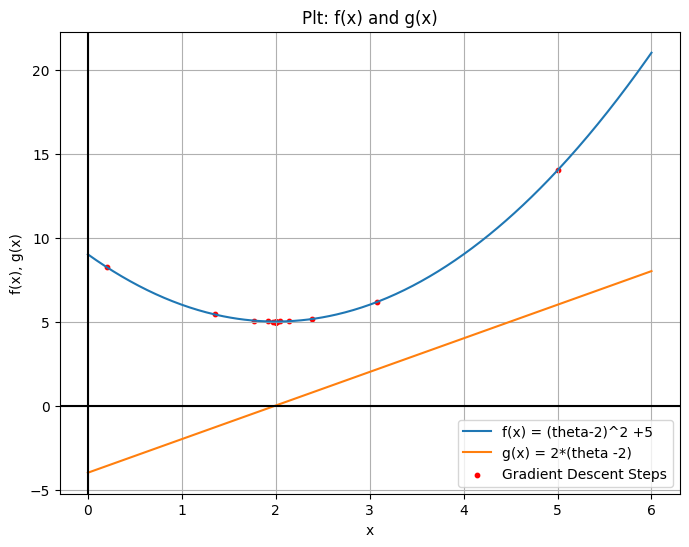

In [52]:
x = np.linspace(0,6,400)
y_f = f(x)
y_g = g(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y_f, label='f(x) = (theta-2)^2 +5')
plt.plot(x, y_g, label='g(x) = 2*(theta -2)')
plt.scatter(theta_values, f_values, color='red', s=10, label='Gradient Descent Steps')
plt.title('Plt: f(x) and g(x)')
plt.xlabel('x')
plt.ylabel('f(x), g(x)')

ax = plt.gca()
ax.axhline(0, color='black', linewidth=1.5)  
ax.axvline(0, color='black', linewidth=1.5) 

plt.grid(True)
plt.legend()

plt.show

### 4. Replace the analytical gradient by a two-sided numerical approximation. This is often necessary in practice when the analytical gradient is hard to compute. Use a two-sided approximation such that $g(θ) = f(θ + h) −f(θ −h)$ Repeat part 3 using the numerical gradient

In [54]:
def g2(theta):
    h = 0.01
    return (f(theta+h)-f(theta-h))/(2*h)


In [55]:
# Learning rate
learning_rate = 0.8

# Stepwise approach in which theta is updated
update_step = lambda theta_old: theta_old - learning_rate * g2(theta_old)

# Initial value
theta = 5.0

# List for storing theta and the gradient
theta_values = [theta]
gradient_values = [g2(theta)]
f_values = [f(theta)]

# Convergence criterion: gradient close to zero
while abs(g2(theta)) > 0.001: 
    theta = update_step(theta)
    theta_values.append(theta)
    gradient_values.append(g2(theta))
    f_values.append(f(theta))

# Print results
print("Final θ",theta_values[-1:])
print("Konvergierte Theta-Werte:", theta_values)
print("Konvergierte Gradient-Werte:", gradient_values)
print("Funktionswert:", f_values)


Final θ [2.000304679869984]
Konvergierte Theta-Werte: [5.0, 0.20000000000010232, 3.0799999999999272, 1.3520000000001176, 2.3887999999999465, 1.766720000000035, 2.139968000000003, 1.916019200000001, 2.050388479999974, 1.9697669120000327, 2.018139852799976, 1.9891160883200243, 2.0065303470079954, 1.9960817917952056, 2.0023509249228866, 1.9985894450462638, 2.0008463329722304, 1.999492200216686, 2.000304679869984]
Konvergierte Gradient-Werte: [5.999999999999872, -3.599999999999781, 2.159999999999762, -1.2959999999997862, 0.7775999999998895, -0.46655999999996034, 0.27993600000000285, -0.16796159999996618, 0.10077695999992642, -0.060466175999929206, 0.03627970559993976, -0.021767823359963856, 0.013060694015987195, -0.007836416409601199, 0.004701849845778483, -0.002821109907458208, 0.0016926659444305159, -0.0010155995666227824, 0.0006093597399559059]
Funktionswert: [14.0, 8.239999999999633, 6.166399999999843, 5.419903999999848, 5.151165439999958, 5.054419558399983, 5.019591041024001, 5.007052

<function matplotlib.pyplot.show(close=None, block=None)>

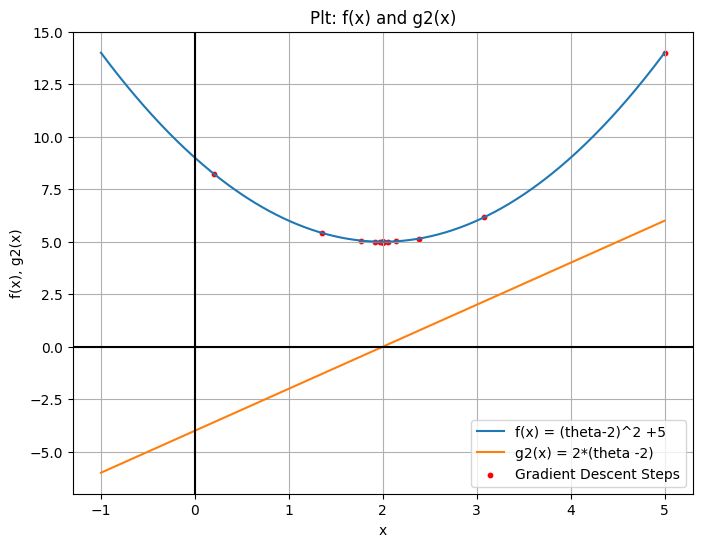

In [56]:
x = np.linspace(-1,5,400)
y_f = f(x)
y_g = g2(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y_f, label='f(x) = (theta-2)^2 +5')
plt.plot(x, y_g, label='g2(x) = 2*(theta -2)')
plt.scatter(theta_values, f_values, color='red', s=10, label='Gradient Descent Steps')
plt.title('Plt: f(x) and g2(x)')
plt.xlabel('x')
plt.ylabel('f(x), g2(x)')

ax = plt.gca()
ax.axhline(0, color='black', linewidth=1.5)  
ax.axvline(0, color='black', linewidth=1.5) 

plt.grid(True)
plt.legend()

plt.show

## 2

In [ ]:
data = pd.read_csv("Lab2_Optimization.csv", delimiter=";")
data

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y=data["LoanAmount"], x=data["TimeToFund"])
plt.title("LoanAmount against TimeToFund")
plt.xlabel('LoanAmount')
plt.ylabel('TimeToFund')
plt.legend()

ax = plt.gca()
ax.axhline(0, color='black', linewidth=1.5)  
ax.axvline(0, color='black', linewidth=1.5) 
#ax.set_xlim([0, 3000])
#ax.set_ylim([0, 30])
plt.show()


In [ ]:
# Functino to calculate MSE
def MSE(beta_0, beta_1, y, X):
    residuals = y - (beta_0 + beta_1 * X)
    return sum(residuals**2) / len(y)

def residuals(beta_0, beta_1, y, X):
    return y - (beta_0 + beta_1 * X)


y = data["TimeToFund"]
X = data["LoanAmount"]
beta_0 = 7
beta_1 = 0.1


f = MSE(beta_0, beta_1, y, X)
print(f)

In [ ]:
beta_1_values = np.linspace(0, 0.01, 100)

mse_values = [MSE(7, beta_1, y, X) for beta_1 in beta_1_values]

plt.figure(figsize=(10, 6))
plt.plot(beta_1_values, mse_values, label='MSE')
plt.title('MSE as a function of β1')
plt.xlabel('β1')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def residuals(beta_0, beta_1, y, X):
    return y - (beta_0 + beta_1 * X)



def gradientOLS(beta_0, beta_1, y, X):
    error = residuals(beta_0, beta_1, y, X)
    g0 = 2 * sum(error) / len(y)
    g1 = 2 * sum(error * X) / len(y)
    return (g0, g1)

In [ ]:
# Initial values for β0 and β1
beta_0 = 5
beta_1 = 0.005

# Learning rate and number of iterations
learning_rate = 0.0001
iterations = 1000

# List for values of β0 and β1
beta_0_values = [beta_0]
beta_1_values = [beta_1]

# Gradient decent
for _ in range(iterations):
    # calculate gradient for current iteration
    g0, g1 = gradientOLS(beta_0, beta_1, y, X)
    
    # Update β0 and β1
    beta_0 -= learning_rate * g0
    beta_1 -= learning_rate * g1
    
    # Saving updated values
    beta_0_values.append(beta_0)
    beta_1_values.append(beta_1)

# Show final values for β0 and β1
print("Final β0:", beta_0_values[-1])
print("Final β1:", beta_1_values[-1])



Die Lernrate ist zu hoch, was dazu führen kann, dass der Algorithmus zu große Schritte macht und sich dadurch von der Lösung wegbewegt statt sich ihr zu nähern.
Die Werte in deinen Daten (X oder y) könnten zu groß sein und, wenn multipliziert, könnten sie zu numerischen Instabilitäten führen.
Es könnte auch Division durch Null auftreten, wenn len(y) gleich Null ist, oder andere ähnliche numerische Fehler.

In [ ]:
# Initial values for β0 and β1
beta_0 = 5
beta_1 = 0.005

# Learning rate and number of iterations
learning_rate = 0.00000001
iterations = 1000

# List for values of β0 and β1
beta_0_values = [beta_0]
beta_1_values = [beta_1]

# Gradient decent
for _ in range(iterations):
    # calculate gradient for current iteration
    g0, g1 = gradientOLS(beta_0, beta_1, y, X)
    
    # Update β0 and β1
    beta_0 -= learning_rate * g0
    beta_1 -= learning_rate * g1
    
    # Saving updated values
    beta_0_values.append(beta_0)
    beta_1_values.append(beta_1)

# Show final values for β0 and β1
print("Final β0:", beta_0_values[-1])
print("Final β1:", beta_1_values[-1])


In [ ]:
X = data["LoanAmount"]/1000

# Initial values for β0 and β1
beta_0 = 5
beta_1 = 0.005

# Learning rate and number of iterations
learning_rate = [0.1,0.01]
iterations = 1000



# Gradient decent
for learning_rate in learning_rate:
    for _ in range(iterations):
        # calculate gradient for current iteration
        g0, g1 = gradientOLS(beta_0, beta_1, y, X)

        # List for values of β0 and β1
        beta_0_values = [beta_0]
        beta_1_values = [beta_1]
        
        # Update β0 and β1
        beta_0 -= learning_rate * g0
        beta_1 -= learning_rate * g1
        
        # Saving updated values
        beta_0_values.append(beta_0)
        beta_1_values.append(beta_1)

        # Show final values for β0 and β1
    print("Final β0:", beta_0_values[-1])
    print("Final β1:", beta_1_values[-1])